<h3>PREDICTING THE BEST WESTERN SUBURBS IN MELBOURNE, AUSTRALIA TO OPEN A NEW FRANCHISE FOR AN INDIAN RESTAURANT </h3>
<h4> Pradeep Reddy</h4>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
    This Notebook consists of below sections. 
    
    1.Introduction
    2.Data Requirements and Cleaning
    3.Methodology
    4.Results 
    5.Discussion
    6.Conclusion 
    
</div>


# 1.	Introduction

As part of the IBM Data Science professional program project, I have reached out to one of my close acquaintance who is the restaurant owner of INKA Australia https://www.inkarestaurant.com.au/ and will be doing analysis on the best western suburbs in Melbourne, Australia chosen by the management to expand their business. This is a real time example for which I will be performing analysis and advising the management as to which would be the best suburb from the 3 councils (Hobsons Bay, Brimbank,Wyndham)
### 1.1.	Background
    
INKA Australia is one of the Indian restaurants which is located in the inner suburbs (Hawthorn) of Melbourne, Australia. During one of the conversations, the restaurant management have expressed their plans of expansion of their business to Western Suburbs in Melbourne.  
###  1.2.	Business Problem
    
Since expanding their restaurant business to other suburbs would be a cost and risk-based plan for the management, they have selected 3 councils i.e, Hobsons Bay, Brimbank and Wyndham but again there is challenge for them to select out of 60 suburbs as to which would be the best suburb for the setup. In this project, I will go through step by step process to make a decision based on the data that might contribute to determine the feasible location to open the Indian restaurant.
We will analyse the localities in the western suburbs in Melbourne to identify the most profitable suburb since the success of the restaurant depends on the nearby venues and categories. 
In this project, I will go through all the process and will provide a conclusion whether the analysis can be leveraged by the business stakeholders to make their decisions

# 2.	Data Requirements and Cleaning

Few Data components are deemed as key factors in selecting the restaurant location We need to analyse the councils’ data, geo-location about the 3 chosen councils as the management has already made up their mind about the councils. Throughout the assignment, I will be using missing value imputation, Foursquare API, Folium map and k-mean clustering. 

 ### 2.1.	Data Sources
 -I will be downloading the information from the site https://www.matthewproctor.com/full_australian_postcodes_vic for Melbourne, Victoria Location data which will make my analysis handy, as it has all the relevant information for the project. Geo-locational information (latitude and longitude ) about that specific locality and the suburbs. I will be using the Australian_postcodes.xls version downloaded from the website. 
-Foursquare API locational information to be used. (basic and advanced information about that venue)
-Data about different venues in different localities based on the suburb under the local councils

### 2.2 How the data will be used to solve the problem

The data are going to be used as follows:

-Use Foursquare and geopy information to map venues for all 3 local councils  and clustered in teams.

-Use foursquare and geopy information to map the placement of which suburb would be the best suitable location based on the K Clusters using 5, individually and on high of the above-clustered map.

-create a map that depicts, the suburb which has the hight K means to select the best suitable location to setup the restaurant 


# 3.	Methodology

This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps.

### The analysis and the stragegy:

First we will normalise the data based on the list of councils extracted from the https://www.matthewproctor.com/full_australian_postcodes_vic . Then we will select the 3 councils selected by the restaurant management. We will do the missing value imputation if they have any missing values/NAN. Then we will use the Four square APIS to get the data about the venues in the 3 councils - localitys'. we will create a map using cluster (K=5) and find which cluster has the highest value under the suburb. 

# 4. Results - Scroll down for Results for the data set
# 5.  Discussion - Scroll down for discussion section
# 6.  Conclusion - Scroll down for Conclusion on the project




In [229]:
import pandas as pd
import numpy as np
cols = [0,1,2,9]
data_df = pd.read_excel('F:\Downloads\Australian_postcodes.xls',index_col =0)

data_df.head()

,Postcode,Locality,State,Long,Lat,DC,Type,SA3,SA3 Name,SA4,SA4 Name,Region,Status
ID,,,,,,,,,,,,,
230,200,ANU,ACT,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,R1,NaN
21820,200,Australian National University,ACT,149.118900,-35.277700,NaN,NaN,NaN,NaN,NaN,NaN,R1,Added 19-Jan-2020
232,800,DARWIN,NT,130.836680,-12.458684,NaN,NaN,70101.0,Darwin City,701.0,Darwin,R1,Updated 6-Feb-2020
233,801,DARWIN,NT,130.836680,-12.458684,NaN,NaN,70101.0,Darwin City,701.0,Darwin,R1,Updated 25-Mar-2020 SA3
234,804,PARAP,NT,130.873315,-12.428017,NaN,NaN,70102.0,Darwin Suburbs,701.0,Darwin,R1,Updated 25-Mar-2020 SA3


In [5]:
#List of columns names from the file 
list(data_df)

['Postcode',
 'Locality',
 'State',
 'Long',
 'Lat',
 'DC',
 'Type',
 'SA3',
 'SA3 Name',
 'SA4',
 'SA4 Name',
 'Region',
 'Status']

In [6]:
# Observed based on the dataframe there are some missing values and shows NAN dropping the values.  Dropping those rows.

#Deleting the columns which we do not need for analysis

data_df.drop(data_df.columns[[2, 5, 6,7,9,10,11,12]], axis = 1, inplace = True)
data_df = data_df.dropna()
data_df = data_df.reset_index(drop=True)

In [7]:
data_df.head()

,Postcode,Locality,Long,Lat,SA3 Name
0,800,DARWIN,130.836680,-12.458684,Darwin City
1,801,DARWIN,130.836680,-12.458684,Darwin City
2,804,PARAP,130.873315,-12.428017,Darwin Suburbs
3,810,ALAWA,130.866242,-12.381806,Darwin Suburbs
4,810,BRINKIN,130.866242,-12.381806,Darwin Suburbs


In [8]:
# Renaming the suburb column name SA3 Name to Council_Name

data_df.rename(columns = {'SA3 Name':'Council_Name','Long':'Longitude','Lat':'Latitude'}, inplace = True)
data_df.head()

,Postcode,Locality,Longitude,Latitude,Council_Name
0,800,DARWIN,130.836680,-12.458684,Darwin City
1,801,DARWIN,130.836680,-12.458684,Darwin City
2,804,PARAP,130.873315,-12.428017,Darwin Suburbs
3,810,ALAWA,130.866242,-12.381806,Darwin Suburbs
4,810,BRINKIN,130.866242,-12.381806,Darwin Suburbs


In [9]:
# Total number of rows and columns 

data_df.shape

(18019, 5)

In [10]:
# Filtering the suburbs based on the 3 councils

temp_df =data_df[(data_df.Council_Name == 'Hobsons Bay') | (data_df.Council_Name == 'Brimbank')| (data_df.Council_Name == 'Wyndham')]

In [11]:
temp_df.head()

,Postcode,Locality,Longitude,Latitude,Council_Name
6011,3015,NEWPORT,144.880556,-37.838242,Hobsons Bay
6012,3015,SOUTH KINGSVILLE,144.880556,-37.838242,Hobsons Bay
6013,3015,SPOTSWOOD,144.880556,-37.838242,Hobsons Bay
6014,3016,WILLIAMSTOWN,144.888461,-37.863743,Hobsons Bay
6015,3016,WILLIAMSTOWN NORTH,144.888461,-37.863743,Hobsons Bay


In [12]:
temp_df.shape


(60, 5)

# Four Square API

In [13]:
CLIENT_ID = 'QEF4SFROUUVOQKNPAFNNRDUW4ACAWSYYG312LM3BKEDDKPIZ' # your Foursquare ID
CLIENT_SECRET = 'CCBFW1WDVTUYDLPFX3SR0QBB5R2UKRYOZ3F1JDJ3PLQMPDRM' # your Foursquare Secret
VERSION = '20180604'

In [110]:
import requests
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [111]:
#Retrieving the venues based on the locality, Latitude and Longitude
West_venues = getNearbyVenues(names=temp_df['Locality'],
                                   latitudes=temp_df['Latitude'],
                                   longitudes=temp_df['Longitude']
                                  )

NEWPORT
SOUTH KINGSVILLE
SPOTSWOOD
WILLIAMSTOWN
WILLIAMSTOWN NORTH
ALTONA
SEAHOLME
ALBION
GLENGALA
SUNSHINE
SUNSHINE NORTH
SUNSHINE WEST
ALBANVALE
KEALBA
KINGS PARK
ST ALBANS
ARDEER
DEER PARK EAST
FIELDSTONE
MAMBOURIN
MANOR LAKES
MOUNT COTTRELL
WYNDHAM VALE
ALTONA EAST
ALTONA GATE
ALTONA NORTH
LAVERTON NORTH
LAVERTON RAAF
WILLIAMS LANDING
WILLIAMS RAAF
ALTONA MEADOWS
LAVERTON
SEABROOK
HOPPERS CROSSING
TARNEIT
TRUGANINA
CHARTWELL
COCOROC
DERRIMUT
POINT COOK
QUANDONG
WERRIBEE
WERRIBEE SOUTH
KEILOR EAST
KEILOR
KEILOR NORTH
KEILOR DOWNS
KEILOR LODGE
TAYLORS LAKES
WATERGARDENS
GARDEN CITY
PORT MELBOURNE
LITTLE RIVER
BROOKFIELD
COBBLEBANK
EXFORD
EYNESBURY
MELTON SOUTH
STRATHTULLOH
WEIR VIEWS


In [112]:
West_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,NEWPORT,-37.838242,144.880556,7-Eleven,-37.840988,144.883114,Convenience Store
1,NEWPORT,-37.838242,144.880556,Newport IGA Plus Liquor,-37.842439,144.882312,Grocery Store
2,NEWPORT,-37.838242,144.880556,Mamma Teresa Woodfired Restaurant,-37.841520,144.882800,Pizza Place
3,NEWPORT,-37.838242,144.880556,The Backyard Est.2016,-37.842660,144.881590,Café
4,SOUTH KINGSVILLE,-37.838242,144.880556,7-Eleven,-37.840988,144.883114,Convenience Store


In [113]:
#Group venues, category, Lat, long by Locality

West_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
ALBANVALE,10,10,10,10,10,10
ALBION,19,19,19,19,19,19
ALTONA,4,4,4,4,4,4
ALTONA EAST,2,2,2,2,2,2
ALTONA GATE,2,2,2,2,2,2
ALTONA MEADOWS,11,11,11,11,11,11
ALTONA NORTH,2,2,2,2,2,2
ARDEER,1,1,1,1,1,1
BROOKFIELD,4,4,4,4,4,4


In [231]:
# one hot encoding

West_onehot = pd.get_dummies(West_venues[['Venue Category']], prefix="", prefix_sep="")
West_onehot.insert(loc=0, column='Locality', value=West_venues['Locality'] )

West_onehot.head(20)

,Locality,Asian Restaurant,Athletics & Sports,Badminton Court,Bakery,Basketball Court,Beach,Bus Station,Business Service,Café,...,Restaurant,Sandwich Place,Shopping Mall,Skating Rink,Supermarket,Thai Restaurant,Toy / Game Store,Train Station,Vietnamese Restaurant,Wine Shop
0,NEWPORT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NEWPORT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NEWPORT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NEWPORT,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,SOUTH KINGSVILLE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,SOUTH KINGSVILLE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,SOUTH KINGSVILLE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,SOUTH KINGSVILLE,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,SPOTSWOOD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,SPOTSWOOD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
West_onehot.shape

(271, 40)

In [116]:
west_grouped = West_onehot .groupby('Locality').mean().reset_index()
west_grouped.head()

,Locality,Asian Restaurant,Athletics & Sports,Badminton Court,Bakery,Basketball Court,Beach,Bus Station,Business Service,Café,...,Restaurant,Sandwich Place,Shopping Mall,Skating Rink,Supermarket,Thai Restaurant,Toy / Game Store,Train Station,Vietnamese Restaurant,Wine Shop
0,ALBANVALE,0.2,0.0,0.0,0.1,0.0,0.0,0.2,0.0,0.000000,...,0.1,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.100000,0.0
1,ALBION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,...,0.0,0.052632,0.0,0.052632,0.0,0.00,0.0,0.052632,0.052632,0.0
2,ALTONA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,...,0.0,0.000000,0.0,0.000000,0.0,0.25,0.0,0.250000,0.000000,0.0
3,ALTONA EAST,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0
4,ALTONA GATE,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0


In [210]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [211]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
west_Sub_venues_sorted = pd.DataFrame(columns=columns)
west_Sub_venues_sorted['Locality'] = west_grouped['Locality']

for ind in np.arange(west_grouped.shape[0]):
    west_Sub_venues_sorted.iloc[ind, 1:] = return_most_common_venues(west_grouped.iloc[ind, :], num_top_venues)

west_Sub_venues_sorted.head()

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALBANVALE,Asian Restaurant,Bus Station,Vietnamese Restaurant,Pharmacy,Portuguese Restaurant,Restaurant,Grocery Store,Bakery,Beach,Business Service
1,ALBION,Gym,Pizza Place,Café,Department Store,Filipino Restaurant,Furniture / Home Store,General Entertainment,Grocery Store,Vietnamese Restaurant,Convenience Store
2,ALTONA,Café,Train Station,Thai Restaurant,Convenience Store,Wine Shop,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Clothing Store
3,ALTONA EAST,Badminton Court,Business Service,Wine Shop,Clothing Store,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store
4,ALTONA GATE,Badminton Court,Business Service,Wine Shop,Clothing Store,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store


In [212]:
#Checking any Missing values 

west_Sub_venues_sorted.isnull().values.any()

False

# Making Clusters for Locality - K Means Clustering

In [213]:
# import k-means from clustering stage
from sklearn.cluster import KMeans 

# set number of clusters
kclusters = 5

#west_grouped_clustering = west_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(west_grouped_clustering)

In [214]:
# add clustering labels

west_Sub_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

west_merged = temp_df

# merge west suburb group with temp_df to add latitude/longitude for each locality
west_merged = west_merged.join(west_Sub_venues_sorted.set_index('Locality'), on='Locality')

west_merged.head() 

,Postcode,Locality,Longitude,Latitude,Council_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6039,3024,FIELDSTONE,144.649936,-37.750456,Wyndham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6040,3024,MAMBOURIN,144.556552,-37.899873,Wyndham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6041,3024,MANOR LAKES,144.581232,-37.866942,Wyndham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6042,3024,MOUNT COTTRELL,144.556552,-37.899873,Wyndham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6043,3024,WYNDHAM VALE,144.556552,-37.899873,Wyndham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
west_merged.shape

(33, 16)

In [216]:
west_merged.head()

,Postcode,Locality,Longitude,Latitude,Council_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6039,3024,FIELDSTONE,144.649936,-37.750456,Wyndham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6040,3024,MAMBOURIN,144.556552,-37.899873,Wyndham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6041,3024,MANOR LAKES,144.581232,-37.866942,Wyndham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6042,3024,MOUNT COTTRELL,144.556552,-37.899873,Wyndham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6043,3024,WYNDHAM VALE,144.556552,-37.899873,Wyndham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
#Checked there were missing values and dropped those rows .

west_merged = west_merged.dropna()

In [218]:
#Checking the status 
west_merged .isnull().values.any()

False

In [219]:
west_merged.head()

,Postcode,Locality,Longitude,Latitude,Council_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6044,3025,ALTONA EAST,144.839704,-37.835562,Wyndham,2.0,Badminton Court,Business Service,Wine Shop,Clothing Store,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store
6045,3025,ALTONA GATE,144.839704,-37.835562,Wyndham,2.0,Badminton Court,Business Service,Wine Shop,Clothing Store,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store
6046,3025,ALTONA NORTH,144.839704,-37.835562,Wyndham,2.0,Badminton Court,Business Service,Wine Shop,Clothing Store,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store
6049,3027,WILLIAMS LANDING,144.743016,-37.861998,Wyndham,1.0,Playground,Wine Shop,Gym,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store,Clothing Store
6051,3028,ALTONA MEADOWS,144.777165,-37.875066,Wyndham,4.0,Fast Food Restaurant,Bakery,Asian Restaurant,Pharmacy,Supermarket,Italian Restaurant,Shopping Mall,Liquor Store,Department Store,Filipino Restaurant


#  Checking the Melbourne co ordinates 

In [220]:
from geopy.geocoders import Nominatim 
address = 'Melbourne, Australia'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Melbourne are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Melbourne are -37.8142176, 144.9631608.


# Creating Map and checking the clusters 

In [235]:
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(west_merged['Latitude'],west_merged['Longitude'],west_merged['Locality'],west_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' +str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_clusters.add_child(MeasureControl())

       
map_clusters

<div id="Results">
    <h2>Results of the dataset</h2>
</div>

## Predicting the location based on the Clusters

After running K-means clustering we can access each cluster created to see which locality were assigned to each of the 5 cluseters. Visualizing the clustered locality on the map using folium library. Each Cluster is color coded for the ease of presentation
#### Based on the above Map location and data retrieved it is observed that cluster  4 would be the best possible location to open up the new restaurant.

 

In [223]:
west_merged[west_merged['Cluster Labels']==4]

,Postcode,Locality,Longitude,Latitude,Council_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6051,3028,ALTONA MEADOWS,144.777165,-37.875066,Wyndham,4.0,Fast Food Restaurant,Bakery,Asian Restaurant,Pharmacy,Supermarket,Italian Restaurant,Shopping Mall,Liquor Store,Department Store,Filipino Restaurant
6052,3028,LAVERTON,144.777165,-37.875066,Wyndham,4.0,Fast Food Restaurant,Bakery,Asian Restaurant,Pharmacy,Supermarket,Italian Restaurant,Shopping Mall,Liquor Store,Department Store,Filipino Restaurant
6053,3028,SEABROOK,144.777165,-37.875066,Wyndham,4.0,Fast Food Restaurant,Bakery,Asian Restaurant,Pharmacy,Supermarket,Italian Restaurant,Shopping Mall,Liquor Store,Department Store,Filipino Restaurant


In [232]:
west_merged[west_merged['Cluster Labels']==3]  

,Postcode,Locality,Longitude,Latitude,Council_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [225]:
west_merged[west_merged['Cluster Labels']==2]  

,Postcode,Locality,Longitude,Latitude,Council_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6044,3025,ALTONA EAST,144.839704,-37.835562,Wyndham,2.0,Badminton Court,Business Service,Wine Shop,Clothing Store,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store
6045,3025,ALTONA GATE,144.839704,-37.835562,Wyndham,2.0,Badminton Court,Business Service,Wine Shop,Clothing Store,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store
6046,3025,ALTONA NORTH,144.839704,-37.835562,Wyndham,2.0,Badminton Court,Business Service,Wine Shop,Clothing Store,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store


In [226]:
 west_merged[west_merged['Cluster Labels']==1]  

,Postcode,Locality,Longitude,Latitude,Council_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6049,3027,WILLIAMS LANDING,144.743016,-37.861998,Wyndham,1.0,Playground,Wine Shop,Gym,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store,Clothing Store
6054,3029,HOPPERS CROSSING,144.705831,-37.837165,Wyndham,1.0,Playground,Wine Shop,Gym,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store,Clothing Store
6055,3029,TARNEIT,144.705831,-37.837165,Wyndham,1.0,Playground,Wine Shop,Gym,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store,Clothing Store
6056,3029,TRUGANINA,144.705831,-37.837165,Wyndham,1.0,Playground,Wine Shop,Gym,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store,Clothing Store
6057,3030,CHARTWELL,144.642090,-37.916240,Wyndham,1.0,Playground,Wine Shop,Gym,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store,Clothing Store
6058,3030,COCOROC,144.642090,-37.916240,Wyndham,1.0,Playground,Wine Shop,Gym,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store,Clothing Store
6059,3030,DERRIMUT,144.642090,-37.916240,Wyndham,1.0,Playground,Wine Shop,Gym,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store,Clothing Store
6060,3030,POINT COOK,144.642090,-37.916240,Wyndham,1.0,Playground,Wine Shop,Gym,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store,Clothing Store
6061,3030,QUANDONG,144.642090,-37.916240,Wyndham,1.0,Playground,Wine Shop,Gym,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store,Clothing Store
6062,3030,WERRIBEE,144.642090,-37.916240,Wyndham,1.0,Playground,Wine Shop,Gym,General Entertainment,Furniture / Home Store,Filipino Restaurant,Fast Food Restaurant,Department Store,Convenience Store,Clothing Store


In [233]:
 west_merged[west_merged['Cluster Labels']==0] 

,Postcode,Locality,Longitude,Latitude,Council_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6975,3338,BROOKFIELD,144.571033,-37.705529,Wyndham,0.0,Fast Food Restaurant,Supermarket,Bus Station,Pizza Place,Wine Shop,Chinese Restaurant,Furniture / Home Store,Filipino Restaurant,Department Store,Convenience Store
6977,3338,EXFORD,144.571033,-37.705529,Wyndham,0.0,Fast Food Restaurant,Supermarket,Bus Station,Pizza Place,Wine Shop,Chinese Restaurant,Furniture / Home Store,Filipino Restaurant,Department Store,Convenience Store
6978,3338,EYNESBURY,144.571033,-37.705529,Wyndham,0.0,Fast Food Restaurant,Supermarket,Bus Station,Pizza Place,Wine Shop,Chinese Restaurant,Furniture / Home Store,Filipino Restaurant,Department Store,Convenience Store
6979,3338,MELTON SOUTH,144.571033,-37.705529,Wyndham,0.0,Fast Food Restaurant,Supermarket,Bus Station,Pizza Place,Wine Shop,Chinese Restaurant,Furniture / Home Store,Filipino Restaurant,Department Store,Convenience Store


# Based on the Australian Statistics the data captured to excel from the link  https://itt.abs.gov.au/.

create a dataframe and created a compunded bar chart to know which suburb has the highest population and income

In [227]:
stats_df = pd.read_excel('F:\IBM Data Science\Capstone Project\Abc_stats.xlsx')

stats_df.head()

,Suburb,Population,Working Age Population (aged 15-64 years) (%),Median total household income (yearly) ($)
0,Hobsons Bay,96470,66.4,42482
1,Wyndham,255322,67.0,40060
2,Brimbank,208714,67.7,32914


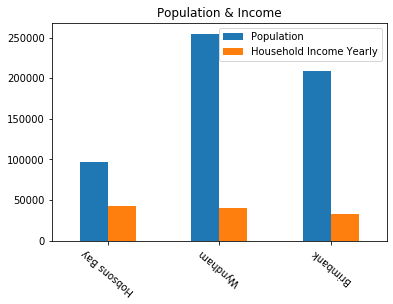

In [228]:
import matplotlib.pyplot as plot

 # A python dictionary

data = {"Population":[96470,255322,208714],"Household Income Yearly":[42482, 40060, 32914]

        };

index = ["Hobsons Bay", "Wyndham", "Brimbank"];

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data, index = index);

# Draw a vertical bar chart

dataFrame.plot.bar(rot=500, title="Population & Income");

plot.show(block=True);



As per the above graphs it clearly indicates that the Wyndham council has the largest population among three councils and better chances to setup a restaurant

# 5.  Discussion

The aim of this project is to help the restaurant management to make a decision to setup a location choosing the best council and locality based on the venues, categories, population, household income. 

Based on the data Cluster 4 are more suitable due to the common venues in that cluster, these localities to have common venues such as Parks, Gym/Fitness centres, Bus Stops, Restaurants, Electronics Stores and Soccer fields which is ideal for a to setup a restaurant so that the foot traffic can be increased and can be more profitable

# 6. Conclusion

This project gives a high-level documentation for the restaurant management team to get a better understanding of the localities under 3 councils with respect to the most common venues, population and household income in those localities. 

It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before setting up a restaurant in a particular area. The ultimate investment and decision of this project would require consideration of other factors such as cost of living in the suburbs, ethnicity, median house prices which would give more in depth analysis.
